In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Data import

In [474]:
daily_df = pd.read_excel('daily_revenue.xlsx')
daily_df.index = daily_df['Date']
daily_df

,Date,Daily Revenue,New paying cardholders,Paying Cardholders,Annual Recurring Fee Revenue,Daily Transactions,Discount Revenue,Signups,Interchange Fee,Annual Fee
Date,,,,,,,,,,
2022-05-19,2022-05-19,0,0,0,0,0,0,10,0.01,95.0
2022-05-20,2022-05-20,0,0,0,0,0,0,10,NaN,NaN
2022-05-21,2022-05-21,0,0,0,0,0,0,10,NaN,NaN
2022-05-22,2022-05-22,0,0,0,0,0,0,10,NaN,NaN
2022-05-23,2022-05-23,0,0,0,0,0,0,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-27,2023-06-27,0,0,0,0,0,0,10,NaN,NaN
2023-06-28,2023-06-28,0,0,0,0,0,0,10,NaN,NaN
2023-06-29,2023-06-29,0,0,0,0,0,0,10,NaN,NaN


In [475]:
monthly_df = daily_df.groupby(pd.Grouper(key="Date", freq="M")).sum()

In [476]:
monthly_df

,Daily Revenue,New paying cardholders,Paying Cardholders,Annual Recurring Fee Revenue,Daily Transactions,Discount Revenue,Signups,Interchange Fee,Annual Fee
Date,,,,,,,,,
2022-05-31,0,0,0,0,0,0,130,0.01,95.0
2022-06-30,0,0,0,0,0,0,300,0.00,0.0
2022-07-31,0,0,0,0,0,0,310,0.00,0.0
2022-08-31,0,0,0,0,0,0,310,0.00,0.0
2022-09-30,0,0,0,0,0,0,300,0.00,0.0
2022-10-31,0,0,0,0,0,0,310,0.00,0.0
2022-11-30,0,0,0,0,0,0,300,0.00,0.0
2022-12-31,0,0,0,0,0,0,310,0.00,0.0
2023-01-31,0,0,0,0,0,0,310,0.00,0.0


## Daily transactions

Text(0.5, 1.0, 'Daily Transactions')

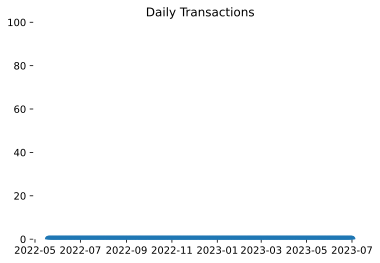

In [7]:
ax = plt.figure()
plt.ylim([0, 100])
plt.plot(daily_df['Daily Transactions'], marker='o')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Daily Transactions')

# Sankey 
Diagram used to visualize customer interviews from CMS and identify which percentage of people are actually willing to put pre-commitments or pre-orders on the product

## Customer Interviews

In [363]:
signup_df = pd.read_excel('customer_interviews.xlsx')
signup_df

In [382]:
signup_df[['Warm Intro']] = signup_df[['Warm Intro']].apply(lambda col:pd.Categorical(col).codes)

In [383]:
sankey_cols = ['Warm Intro', 'Email Sent',
               'Follow Up Sent', 'Interview Scheduled',
               'Interview', 'Precommitment']
signup_sankey_df = signup_df[sankey_cols]
signup_sankey_df

,Warm Intro,Email Sent,Follow Up Sent,Interview Scheduled,Interview,Precommitment
0,1,True,1.0,1.0,1.0,1.0
1,1,False,0.0,NaN,NaN,NaN
2,1,True,0.0,1.0,1.0,1.0
3,0,True,1.0,1.0,1.0,1.0
4,1,True,1.0,1.0,1.0,0.0
5,0,True,1.0,1.0,1.0,0.0
6,1,True,1.0,1.0,1.0,0.0
7,0,True,NaN,NaN,NaN,NaN
8,1,True,1.0,1.0,NaN,NaN
9,1,True,1.0,NaN,NaN,NaN


In [384]:
signup_sankey_df = signup_sankey_df.fillna(-1)

In [385]:
def key_assigner(x, ndx):
    if x == -1:
        return -1
    return x + ndx*2

categorical_df = signup_sankey_df.copy()
for ndx, col in enumerate(signup_sankey_df.columns):
    categorical_df[col] = categorical_df[col].apply(lambda x: key_assigner(x, ndx))
    

In [386]:
categorical_df

,Warm Intro,Email Sent,Follow Up Sent,Interview Scheduled,Interview,Precommitment
0,1,3,5.0,7.0,9.0,11.0
1,1,2,4.0,-1.0,-1.0,-1.0
2,1,3,4.0,7.0,9.0,11.0
3,0,3,5.0,7.0,9.0,11.0
4,1,3,5.0,7.0,9.0,10.0
5,0,3,5.0,7.0,9.0,10.0
6,1,3,5.0,7.0,9.0,10.0
7,0,3,-1.0,-1.0,-1.0,-1.0
8,1,3,5.0,7.0,-1.0,-1.0
9,1,3,5.0,-1.0,-1.0,-1.0


In [396]:
import plotly.graph_objects as go

In [477]:
# Create a mapping between different nodes in the customer interview flow for Plotly
source_target_df = pd.DataFrame()
source_target_df['source'] = pd.concat([categorical_df[col] for col in categorical_df.columns[:-1]])
source_target_df['target'] = pd.concat([categorical_df[col] for col in categorical_df.columns[1:]])
source_target_df['value'] = 1
source_target_df

,source,target,value
0,1.0,3.0,1
1,1.0,2.0,1
2,1.0,3.0,1
3,0.0,3.0,1
4,1.0,3.0,1
5,0.0,3.0,1
6,1.0,3.0,1
7,0.0,3.0,1
8,1.0,3.0,1
9,1.0,3.0,1


In [389]:
labels = {}
label_names = []

for col in categorical_df.columns:
    label_names += ['No ' + col]
    label_names += [col]
labels_dict = dict(enumerate(label_names))
labels_dict

{0: 'No Warm Intro',
 1: 'Warm Intro',
 2: 'No Email Sent',
 3: 'Email Sent',
 4: 'No Follow Up Sent',
 5: 'Follow Up Sent',
 6: 'No Interview Scheduled',
 7: 'Interview Scheduled',
 8: 'No Interview',
 9: 'Interview',
 10: 'No Precommitment',
 11: 'Precommitment'}

In [395]:
source = source_target_df['source']
target = source_target_df['target']
value = source_target_df['value']

link = dict(source = source, target = target, value = value)
node = {'label': label_names}

data = go.Sankey(link = link, node = node)

fig = go.Figure(data)
fig.update_layout(title="Customer Interview to Precommitment Funnel")
    
fig.show()

## Landing page signups

In [407]:
landing_page_df = pd.read_excel('customer_interviews.xlsx')

In [410]:
ref_col = 'How did you hear about us?'
landing_page_df = landing_page_df[[ref_col]]
landing_page_df

,How did you hear about us?
0,Ad
1,Ad
2,Reddit
3,Reddit
4,Facebook
5,Other
6,Other
7,Facebook
8,Reddit
9,YouTube


In [411]:
landing_page_df[ref_col].value_counts()

Reddit      3
Other       2
Facebook    2
Ad          2
YouTube     1
Name: How did you hear about us?, dtype: int64

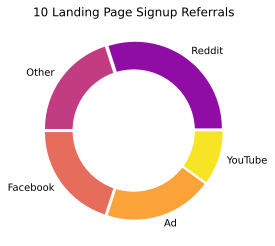

In [472]:
# create data
names = landing_page_df[ref_col].value_counts().index
size = landing_page_df[ref_col].value_counts()
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Pallet
colors = plt.cm.plasma(np.linspace(0.3, 0.95, len(size)))

# Explode
explode = [0.03 for n in range(len(size+1))]


# Give color names
plt.pie(size, labels=names, colors=colors, explode=explode)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title(f'{landing_page_df[ref_col].value_counts().sum()} Landing Page Signup Referrals')

# Show the graph
plt.show()

## Monthly Revenue + Runway

In [461]:
runway_df = pd.read_excel('burn_rate.xlsx')
runway_df.set_index('Month', inplace=True)
runway_df['Cash Balance'] = (runway_df['Capital Contribution'].cumsum() +
                             runway_df['Monthly Revenue'].cumsum() - 
                             runway_df['Monthly Expenses'].cumsum())
runway_df

,Capital Contribution,Monthly Expenses,Monthly Revenue,Cash Balance
Month,,,,
2022-05-01,20000,2500,500.000000,18000.000000
2022-06-01,0,2500,550.000000,16050.000000
2022-07-01,0,2500,605.000000,14155.000000
2022-08-01,0,2500,665.500000,12320.500000
2022-09-01,0,2500,732.050000,10552.550000
2022-10-01,0,2500,805.255000,8857.805000
2022-11-01,0,2500,885.780500,7243.585500
2022-12-01,0,2500,974.358550,5717.944050
2023-01-01,0,2500,1071.794405,4289.738455


Text(0.5, 1.0, 'Runway and Monthly Revenue')

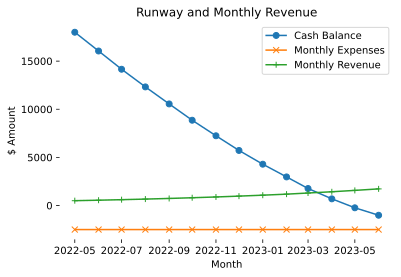

In [473]:
ax = plt.figure()
plt.plot(runway_df['Cash Balance'], marker='o', label='Cash Balance')
plt.plot(-runway_df['Monthly Expenses'], marker='x', label='Monthly Expenses')
plt.plot(runway_df['Monthly Revenue'], marker='+', label='Monthly Revenue')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend()
plt.xlabel('Month')
plt.ylabel('$ Amount')
plt.title('Runway and Monthly Revenue')